In [ ]:
!pip install numpy matplotlib opencv-python scikit-image

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soumyaneelsarkar/skull-fracture-dataset-original")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/soumyaneelsarkar/skull-fracture-dataset-original/versions/3


In [ ]:
import os

download_path = "/root/.cache/kagglehub/datasets/soumyaneelsarkar/skull-fracture-dataset-original/versions/3"

for root, dirs, files in os.walk(download_path):
    print(f"Directory: {root}")
    for file in files:
        print(f"  File: {file}")

Directory: /root/.cache/kagglehub/datasets/soumyaneelsarkar/skull-fracture-dataset-original/versions/3
Directory: /root/.cache/kagglehub/datasets/soumyaneelsarkar/skull-fracture-dataset-original/versions/3/data
Directory: /root/.cache/kagglehub/datasets/soumyaneelsarkar/skull-fracture-dataset-original/versions/3/data/data
Directory: /root/.cache/kagglehub/datasets/soumyaneelsarkar/skull-fracture-dataset-original/versions/3/data/data/train
Directory: /root/.cache/kagglehub/datasets/soumyaneelsarkar/skull-fracture-dataset-original/versions/3/data/data/train/b
  File: 597_0_3517.png
  File: 4921_0_9897.png
  File: 673_0_2772.png
  File: 603_0_7704.png
  File: 7620_0_4332.png
  File: depressed-skull-fractures-hammer (16)_0_5911.png
  File: clival-fracture (6)_0_15.png
  File: eosinophilic-granuloma-of-the-skull (6)_0_3732.png
  File: ping-pong-skull-fracture-5 (34)_0_2312.png
  File: ping-pong-skull-fracture-5 - 2024-06-02T140125_0_3106.png
  File: 408_0_3939.png
  File: 5322_0_601.png
  F

In [ ]:
img = io.imread("/root/.cache/kagglehub/datasets/soumyaneelsarkar/skull-fracture-dataset-original/versions/3/data/data/train/b/597_0_3517.png", as_gray=True)
img_uint8 = (img * 255).astype('uint8')

In [ ]:
global_eq = cv2.equalizeHist(img_uint8)

In [ ]:
clahe1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img_uint8)
clahe2 = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)).apply(img_uint8)

In [ ]:
titles = [
    "Original",
    "Global Histogram Equalization",
    "CLAHE (clip=2, tile=8x8)",
    "CLAHE (clip=3, tile=8x8)"
]

In [ ]:
images = [img_uint8, global_eq, clahe1, clahe2]


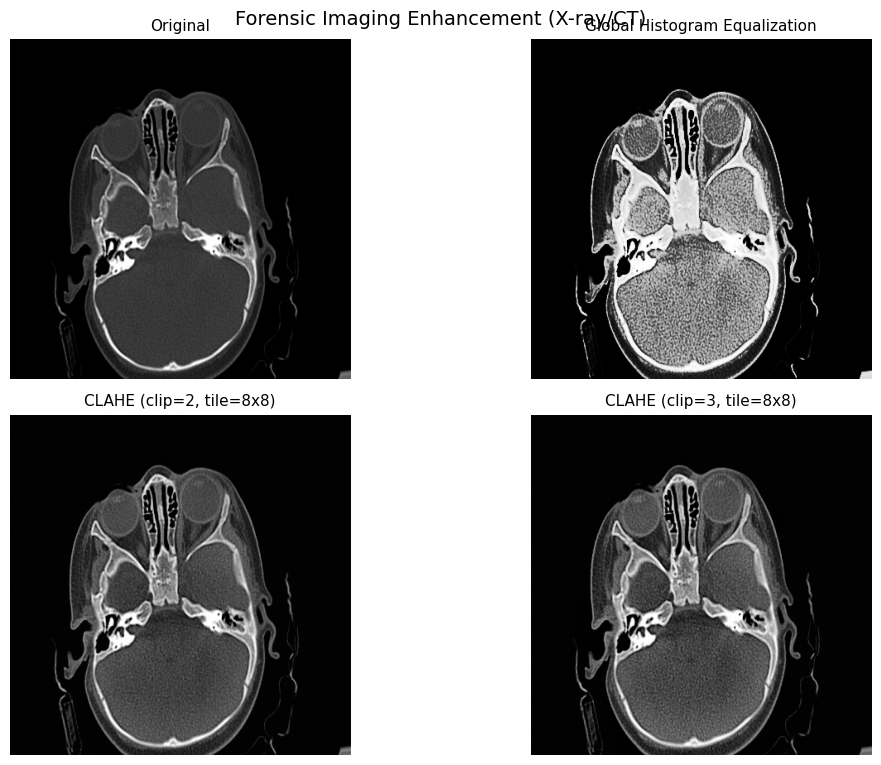

In [ ]:
plt.figure(figsize=(12,8))
for i in range(len(images)):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=11)
    plt.axis("off")

plt.suptitle("Forensic Imaging Enhancement (X-ray/CT)", fontsize=14, y=0.95)
plt.tight_layout()
plt.show()